In [1]:
import pandas as pd
import numpy as np

In [2]:
# read the csv file 

data = pd.read_csv('/Users/yubinye/Downloads/笔试题目/data.csv')
data.shape

(4000, 8)

In [3]:
data.head()

,ID,Date_,Region_a_,Revenue_10k_,Spending_k_,le10a_,le10n_,le10p_
0,0,1/1/2019,A,1612.908021,35,0,1,0
1,1,2/1/2019,A,1233.465757,12,0,1,1
2,2,3/1/2019,A,1209.216561,31,0,1,1
3,3,4/1/2019,A,1394.059101,19,0,1,1
4,4,5/1/2019,A,1290.445177,7,0,0,1


查看数据后，发现2个连续变量，4个离散变量，1个时间变量

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            4000 non-null   int64  
 1   Date_         4000 non-null   object 
 2   Region_a_     4000 non-null   object 
 3   Revenue_10k_  4000 non-null   float64
 4   Spending_k_   4000 non-null   int64  
 5   le10a_        4000 non-null   int64  
 6   le10n_        4000 non-null   int64  
 7   le10p_        4000 non-null   int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 250.1+ KB


# 1. 请展示总体数据概览

- 包含除了 ID 以外的中位数，均值，Quantiles。
- 二分变量展示个数及占比。 

### 时间 Date_

In [5]:
import datetime
import time
import numpy as np

date = data['Date_']
sec = [time.mktime(datetime.datetime.strptime(d, "%d/%m/%Y").timetuple()) for d in date]

median = datetime.datetime.fromtimestamp(np.median(sec)).date()
mean = datetime.datetime.fromtimestamp(np.mean(sec)).date()
Q1 = datetime.datetime.fromtimestamp(np.quantile(sec, 0.25)).date()
Q3 = datetime.datetime.fromtimestamp(np.quantile(sec, 0.75)).date()

print('\n',
      'median of date is',median,'\n',
      'mean  of  date is',mean,'\n',
      'the 25% of date is',Q1,'\n',
      'the 75% of date is',Q3,'\n')


 median of date is 2019-01-12 
 mean  of  date is 2019-06-27 
 the 25% of date is 2019-01-06 
 the 75% of date is 2020-01-06 



### 区域 Region_a_ 

In [6]:
def count_percent(col):
    count = data[col].value_counts()
    percent = data[col].value_counts()/len(data[col])

    print(count)
    print()
    print(percent)

In [7]:
count_percent('Region_a_')

A    1344
B    1336
C    1320
Name: Region_a_, dtype: int64

A    0.336
B    0.334
C    0.330
Name: Region_a_, dtype: float64


### 是否出售 le10a_, le10n_, le10p_

In [8]:
count_percent('le10a_')

0    2796
1    1204
Name: le10a_, dtype: int64

0    0.699
1    0.301
Name: le10a_, dtype: float64


In [9]:
count_percent('le10n_')

1    2376
0    1624
Name: le10n_, dtype: int64

1    0.594
0    0.406
Name: le10n_, dtype: float64


In [10]:
count_percent('le10p_')

1    3608
0     392
Name: le10p_, dtype: int64

1    0.902
0    0.098
Name: le10p_, dtype: float64


### 收入 Revenue_10k 

In [11]:
def summary_(col):
    
    md = data[col].median()
    me = data[col].mean()
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)

    print('\n',
          'median of %s is'%col,md,'\n',
          'mean   of %s is'%col,me,'\n',
          'the 1/4 of %s is'%col,Q1,'\n',
          'the 3/4 of %s is'%col,Q3,'\n') 

In [12]:
summary_('Revenue_10k_')


 median of Revenue_10k_ is 1387.291875 
 mean   of Revenue_10k_ is 1349.321724612978 
 the 1/4 of Revenue_10k_ is 1218.361216 
 the 3/4 of Revenue_10k_ is 1514.835235 



### 支出 Spending_k

In [13]:
summary_('Spending_k_')


 median of Spending_k_ is 20.0 
 mean   of Spending_k_ is 19.9955 
 the 1/4 of Spending_k_ is 10.0 
 the 3/4 of Spending_k_ is 30.0 



# 2. 请分别计算C区域2019年和2020年总体收入

In [14]:
#先转换时间格式
data['Date_'] = pd.to_datetime(data['Date_'])

In [65]:
# 取出 c 区域的子集， subset data of C region
dt_c = data[data['Region_a_'].str.contains('C')]

In [ ]:
 data[data['Region_a_'].str.contains('C')].group

In [66]:
# 计算 revenue in 2019
dt_c.query(' 2020 > Date_ >= 2019')[['Revenue_10k_']].sum()

Revenue_10k_    929342.015022
dtype: float64

In [17]:
# 计算revenue in 2020
dt_c.query(' Date_ >= 2020')[['Revenue_10k_']].sum()

Revenue_10k_    854774.559746
dtype: float64

# 3. 请将原始数据分区域/月份分别计算出以下特征变量

Feature_1

In [46]:
data['month'] = data['Date_'].dt.month

revenue = data.groupby(['Region_a_','month'])[['Revenue_10k_']].mean()
table = pd.DataFrame(list(revenue.index),columns = ['region','month'])
table['Feature_1'] = revenue['Revenue_10k_'].values*12

In [56]:
data.groupby(['Region_a_'])[['Revenue_10k_']].describe()

Revenue_10k_                                                    \
                 count         mean         std         min          25%   
Region_a_                                                                  
A               1344.0  1351.099832  206.873730  579.213046  1225.957429   
B               1336.0  1345.278555  203.810147  582.710114  1216.908408   
C               1320.0  1351.603466  213.123243  516.855236  1214.616089   

                                                  
                   50%          75%          max  
Region_a_                                         
A          1393.374109  1509.411500  1649.722747  
B          1375.841065  1510.995897  1649.810433  
C          1391.587866  1522.429230  1649.612336

Feature_2

In [47]:
spend = data.groupby(['Region_a_','month'])[['Spending_k_']].mean()
reven_spend = 100 * revenue['Revenue_10k_'] / spend['Spending_k_']
table['Feature_2'] = reven_spend.values

Feature_3

In [48]:
data['le10_anp'] = data['le10a_'] + data['le10n_'] + data['le10p_']
le10 = data.groupby(['Region_a_','month'])[['le10_anp']].mean()
table['Feature_3'] = le10.values

In [49]:
table

,region,month,Feature_1,Feature_2,Feature_3
0,A,1,16030.393030,7059.211739,1.906780
1,A,2,16286.118375,7204.085951,1.822034
2,A,3,16181.000846,7024.310445,1.821429
3,A,4,16223.078681,7082.104819,1.723214
4,A,5,15974.095861,6757.231752,1.836364
5,A,6,16318.987386,7555.086753,1.745455
6,A,7,16605.449672,7121.020374,1.810811
7,A,8,16436.642960,7663.253396,1.819820
8,A,9,16052.445416,7364.735551,1.818182
9,A,10,15927.585544,6298.656923,1.781818


In [50]:
#结果整合并导出到一个表格。
table.to_csv('/Users/yubinye/Downloads/笔试题目/table.csv')

# 聚类分析

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from scipy.spatial import distance
from sklearn.metrics import confusion_matrix

In [24]:
df = pd.read_csv('/Users/yubinye/Downloads/笔试题目/clustering.csv')
df.head()

,Unnamed: 0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature91,feature92,feature93,feature94,feature95,feature96,feature97,feature98,feature99,feature100
0,0,-6.965934,-7.243168,-5.957356,-9.775332,-7.214448,2.358415,7.468825,-7.925326,-0.495784,...,7.089308,-7.215623,7.348944,-7.110795,-5.384429,-3.251491,-8.871877,6.103534,-3.054405,2.422529
1,1,-3.061556,-5.738294,4.531790,2.641418,-6.158123,-1.263775,8.156871,-5.422324,8.707226,...,-4.357693,9.709324,2.843303,-3.578935,2.781766,3.619061,6.313139,7.383031,4.101057,-7.627897
2,2,-1.423953,3.194756,7.680288,2.008651,-6.463541,-2.476261,9.349953,0.837542,7.023128,...,-5.921400,-4.740912,0.583960,3.811565,4.445046,-7.274840,7.626860,-4.760613,1.394643,-1.078461
3,3,9.458296,9.171957,2.479154,8.601634,4.428396,6.004456,-0.950245,6.527234,0.890620,...,4.562135,-3.878118,-8.967603,-8.861642,-4.744673,2.555338,-0.974350,-8.500711,-1.751951,6.294053
4,4,-1.323053,0.752196,2.282175,-9.173488,2.578326,-4.396539,8.744816,-1.560464,-0.257537,...,-1.041550,-6.849632,6.212779,-7.806786,-7.875223,-8.629507,8.539006,6.934627,3.664748,-0.649770


In [25]:
#查看 Unnamed: 0 这一列是observation 还是多于的 index
df['Unnamed: 0']

0          0
1          1
2          2
3          3
4          4
        ... 
1995    1995
1996    1996
1997    1997
1998    1998
1999    1999
Name: Unnamed: 0, Length: 2000, dtype: int64

In [26]:
# 既然是多余的 index，就删掉
df.drop(['Unnamed: 0'], axis=1,inplace = True)
df.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature91,feature92,feature93,feature94,feature95,feature96,feature97,feature98,feature99,feature100
0,-6.965934,-7.243168,-5.957356,-9.775332,-7.214448,2.358415,7.468825,-7.925326,-0.495784,1.838943,...,7.089308,-7.215623,7.348944,-7.110795,-5.384429,-3.251491,-8.871877,6.103534,-3.054405,2.422529
1,-3.061556,-5.738294,4.531790,2.641418,-6.158123,-1.263775,8.156871,-5.422324,8.707226,-3.708561,...,-4.357693,9.709324,2.843303,-3.578935,2.781766,3.619061,6.313139,7.383031,4.101057,-7.627897
2,-1.423953,3.194756,7.680288,2.008651,-6.463541,-2.476261,9.349953,0.837542,7.023128,-1.171933,...,-5.921400,-4.740912,0.583960,3.811565,4.445046,-7.274840,7.626860,-4.760613,1.394643,-1.078461
3,9.458296,9.171957,2.479154,8.601634,4.428396,6.004456,-0.950245,6.527234,0.890620,-4.342061,...,4.562135,-3.878118,-8.967603,-8.861642,-4.744673,2.555338,-0.974350,-8.500711,-1.751951,6.294053
4,-1.323053,0.752196,2.282175,-9.173488,2.578326,-4.396539,8.744816,-1.560464,-0.257537,-8.794834,...,-1.041550,-6.849632,6.212779,-7.806786,-7.875223,-8.629507,8.539006,6.934627,3.664748,-0.649770


这份数据集很不寻常，因为没有observations，只有100个features

从可视化的角度认识这份数据集

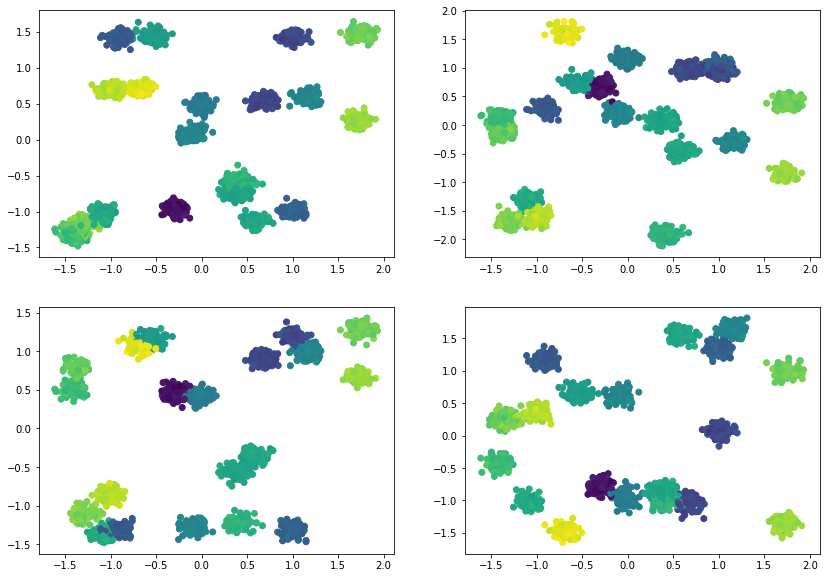

In [27]:
# 先归一化
X = df.values
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

#尝试选择固定的一列数据，例如第一列，为横轴，再分别以其它列，为纵轴，画出散点图
plt.figure(figsize=(14,10) )

#固定最后一列作为颜色对照
y = df.iloc[:,-1].values.ravel()

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c = y)

plt.subplot(222)
plt.scatter(X[:, 0], X[:, 2], c = y)

plt.subplot(223)
plt.scatter(X[:, 0], X[:, 3], c = y)

plt.subplot(224)
plt.scatter(X[:, 0], X[:, 4], c = y)

plt.show()

发现几乎每一个平面几乎都有18-24个左右的cluster

尝试用k-mean聚类，先用Elbow Method寻找最佳的k值

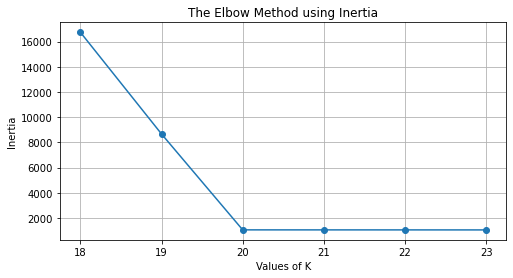

In [28]:
inertia_list = []
for k in range(18,24):
    kmeans_classifier = KMeans(n_clusters=k)
    y_kmeans = kmeans_classifier.fit_predict(X)
    inertia = kmeans_classifier.inertia_
    inertia_list.append(inertia)
    
plt.figure(figsize=(8,4) )
plt.plot(range(18,24), inertia_list, marker = 'o')
plt.xticks(range(18,24))
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia')

plt.grid(True)
plt.show()

最佳k为20

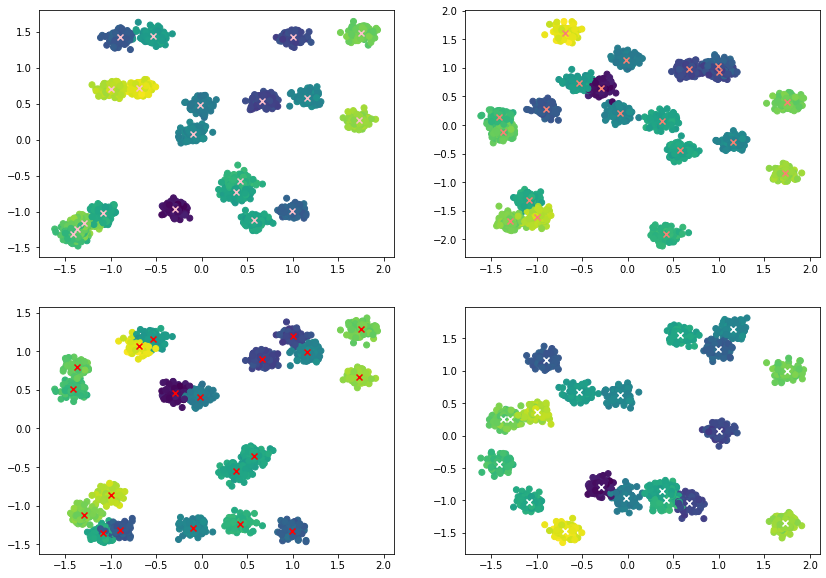

In [29]:
#建立模型并可视化
K = 20
kmeans_model = KMeans(n_clusters=K).fit(X)
centers = np.array(kmeans_model.cluster_centers_)

#尝试选择固定的一列数据，例如第一列，为横轴，分别以其它列为纵轴，画出散点图
plt.figure(figsize=(14,10) )

plt.title('k means centroids')

#以最后一列区分颜色，没有其他意义
y = df.iloc[:,-1].values.ravel()

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='pink')

plt.subplot(222)
plt.scatter(X[:, 0], X[:, 2], c = y)
plt.scatter(centers[:,0], centers[:,2], marker="x", color='salmon')

plt.subplot(223)
plt.scatter(X[:, 0], X[:, 3], c = y)
plt.scatter(centers[:,0], centers[:,3], marker="x", color='red')

plt.subplot(224)
plt.scatter(X[:, 0], X[:, 4], c = y)
plt.scatter(centers[:,0], centers[:,4], marker="x", color='white')

plt.show()

因为每个平面都有不同的cluster分布，所以尝试降维度，寻找这些cluster收敛后的分布。

关于降维方法的选择： https://www.analyticsvidhya.com/blog/2018/08/dimensionality-reduction-techniques-python/

基于数据的分布情况，参考文章后，选择用t-SNE方法降低维度

Computing pairwise distances...
Computing pair_prob for point 0 of 2000 ...
Computing pair_prob for point 500 of 2000 ...
Computing pair_prob for point 1000 of 2000 ...
Computing pair_prob for point 1500 of 2000 ...
Mean value of sigma:  0.2669349488276782
T-SNE DURING:7.830690728
Iteration  100 : error is  10.493883032303302
Iteration  200 : error is  0.9716528392571971
ratio  0.0925923069912405
Iteration  300 : error is  0.882329993965948
ratio  0.9080712352371305
Iteration  400 : error is  0.8519167298092989
ratio  0.9655307375192519
finished training!


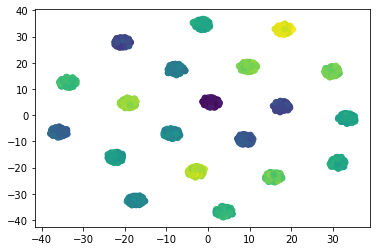

In [30]:
# tSNE的代码来自 https://github.com/heucoder/dimensionality_reduction_alo_codes/blob/master/codes/T-SNE/TSNE.py

'''
author: heucoder
email: 812860165@qq.com
date: 2019.6.13
'''

def cal_pairwise_dist(x):
    '''计算pairwise 距离, x是matrix
    (a-b)^2 = a^2 + b^2 - 2*a*b
    '''
    sum_x = np.sum(np.square(x), 1)
    dist = np.add(np.add(-2 * np.dot(x, x.T), sum_x).T, sum_x)
    #返回任意两个点之间距离的平方
    return dist

def cal_perplexity(dist, idx=0, beta=1.0):
    '''计算perplexity, D是距离向量，
    idx指dist中自己与自己距离的位置，beta是高斯分布参数
    这里的perp仅计算了熵，方便计算
    '''
    prob = np.exp(-dist * beta)
    # 设置自身prob为0
    prob[idx] = 0
    sum_prob = np.sum(prob)
    if sum_prob < 1e-12:
        prob = np.maximum(prob, 1e-12)
        perp = -12
    else:
        perp = np.log(sum_prob) + beta * np.sum(dist * prob) / sum_prob
        prob /= sum_prob

    return perp, prob

def seach_prob(x, tol=1e-5, perplexity=30.0):
    '''二分搜索寻找beta,并计算pairwise的prob
    '''

    # 初始化参数
    print("Computing pairwise distances...")
    (n, d) = x.shape
    dist = cal_pairwise_dist(x)
    dist[dist < 0] = 0
    pair_prob = np.zeros((n, n))
    beta = np.ones((n, 1))
    # 取log，方便后续计算
    base_perp = np.log(perplexity)

    for i in range(n):
        if i % 500 == 0:
            print("Computing pair_prob for point %s of %s ..." %(i,n))

        betamin = -np.inf
        betamax = np.inf
        perp, this_prob = cal_perplexity(dist[i], i, beta[i])

        # 二分搜索,寻找最佳sigma下的prob
        perp_diff = perp - base_perp
        tries = 0
        while np.abs(perp_diff) > tol and tries < 50:
            if perp_diff > 0:
                betamin = beta[i].copy()
                if betamax == np.inf or betamax == -np.inf:
                    beta[i] = beta[i] * 2
                else:
                    beta[i] = (beta[i] + betamax) / 2
            else:
                betamax = beta[i].copy()
                if betamin == np.inf or betamin == -np.inf:
                    beta[i] = beta[i] / 2
                else:
                    beta[i] = (beta[i] + betamin) / 2

            # 更新perb,prob值
            perp, this_prob = cal_perplexity(dist[i], i, beta[i])
            perp_diff = perp - base_perp
            tries = tries + 1
        # 记录prob值
        pair_prob[i,] = this_prob
    print("Mean value of sigma: ", np.mean(np.sqrt(1 / beta)))
    #每个点对其他点的条件概率分布pi\j
    return pair_prob

def tsne(x, no_dims=2, perplexity=30.0, max_iter=1000):
    """Runs t-SNE on the dataset in the NxD array x
    to reduce its dimensionality to no_dims dimensions.
    The syntaxis of the function is Y = tsne.tsne(x, no_dims, perplexity),
    where x is an NxD NumPy array.
    """

    # Check inputs
    if isinstance(no_dims, float):
        print("Error: array x should have type float.")
        return -1

    (n, d) = x.shape

    # 动量
    initial_momentum = 0.5
    final_momentum = 0.8
    eta = 500
    min_gain = 0.01
    # 随机初始化Y
    y = np.random.randn(n, no_dims)
    # dy梯度
    dy = np.zeros((n, no_dims))
    # iy是什么
    iy = np.zeros((n, no_dims))

    gains = np.ones((n, no_dims))

    # 对称化
    P = seach_prob(x, 1e-5, perplexity)
    P = P + np.transpose(P)
    P = P / np.sum(P)   #pij
    # early exaggeration
    # pi\j，提前夸大
    print ("T-SNE DURING:%s" % time.perf_counter())
    P = P * 4
    P = np.maximum(P, 1e-12)

    # Run iterations
    for iter in range(max_iter):
        # Compute pairwise affinities
        sum_y = np.sum(np.square(y), 1)
        num = 1 / (1 + np.add(np.add(-2 * np.dot(y, y.T), sum_y).T, sum_y))
        num[range(n), range(n)] = 0
        Q = num / np.sum(num)   #qij
        Q = np.maximum(Q, 1e-12)    #X与Y逐位比较取其大者

        # Compute gradient
        # np.tile(A,N) 重复数组AN次 [1],5 [1,1,1,1,1]
        # pij-qij
        PQ = P - Q
        # 梯度dy
        for i in range(n):
            dy[i,:] = np.sum(np.tile(PQ[:,i] * num[:,i], (no_dims, 1)).T * (y[i,:] - y), 0)

        # Perform the update
        if iter < 20:
            momentum = initial_momentum
        else:
            momentum = final_momentum

        gains = (gains + 0.2) * ((dy > 0) != (iy > 0)) + (gains * 0.8) * ((dy > 0) == (iy > 0))
        gains[gains < min_gain] = min_gain
        # 迭代
        iy = momentum * iy - eta * (gains * dy)
        y = y + iy
        y = y - np.tile(np.mean(y, 0), (n, 1))
        # Compute current value of cost function\
        if (iter + 1) % 100 == 0:
            C = np.sum(P * np.log(P / Q))
            print("Iteration ", (iter + 1), ": error is ", C)
            if (iter+1) != 100:
                ratio = C/oldC
                print("ratio ", ratio)
                if ratio >= 0.95:
                    break
            oldC = C
        # Stop lying about P-values
        if iter == 100:
            P = P / 4
    print("finished training!")
    return y

if __name__ == "__main__":
    X = df.values
    scaler = StandardScaler()
    scaler.fit(X)
    X = scaler.transform(X)
    y = df.iloc[:,-1].values.ravel()

    data_2d = tsne(X, 2)
    plt.scatter(data_2d[:, 0], data_2d[:, 1], c = y)
    plt.show()

通过tsne降低维度后，发现彼此分割很明显的20个cluster

用k-mean重新分类，并标出新的质心。

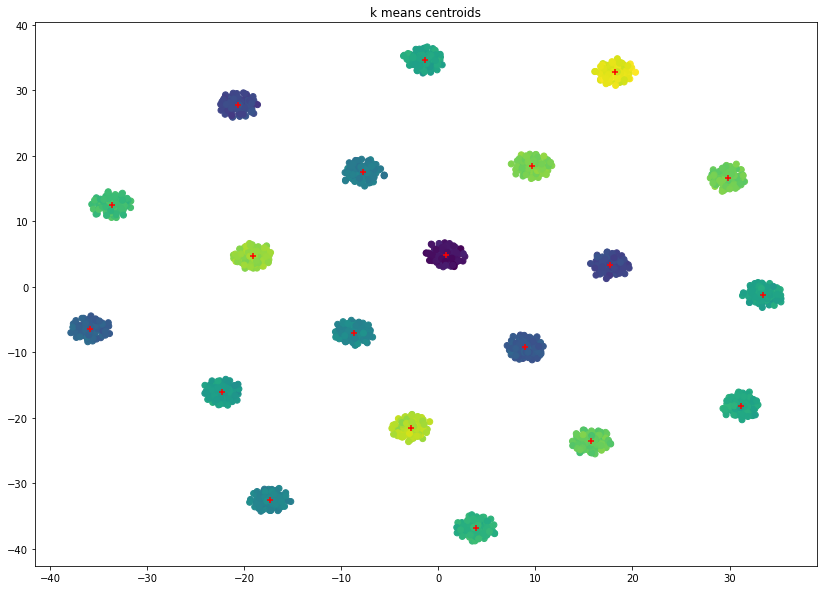

In [31]:
# KMeans algorithm 
K = 20
kmeans_model = KMeans(n_clusters=K).fit(data_2d)
centers = np.array(kmeans_model.cluster_centers_)

plt.figure(figsize=(14,10) )
plt.plot()
plt.title('k means centroids')

plt.scatter(data_2d[:, 0], data_2d[:, 1], c = y)
plt.scatter(centers[:,0], centers[:,1], marker="+", color='red')
plt.show()